# Lecture 14 LIVE

## Topics from Lecture
- Train-Model-Predict Paradigm
- Featurization of Samples
- Predicting Class Labels as Classification
- Linear Classifiers
- K-Nearest Neighbors Classifier

## Oral Understanding Questions

### Question 1: Understanding Regression

**Explain how regression works. Try to appeal to the train-model-predict paradigm for learning. How does regression solve an optimization problem?**

### Question 2: Understanding Linear Classifiers

**Explain how a linear classifier works. How is classification different from regression?**

You can appeal to the following code in your answer. How would predict the values of the gray points?

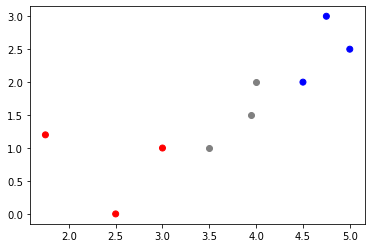

In [2]:
# Following code from https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Training Data
X_train = np.array([[1.75,1.2], [2.5,0], [3,1], [4.5,2], [4.75,3], [5,2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
## Setting Colors for the Training Data
color_dict = {0: 'red',1:'blue'}
train_Colors = [ color_dict[i] for i in y_train]
## Plotting the Training Data
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_Colors)

## Testing Data
X_test = np.array([[3.5,1],[3.95,1.5],[4,2]])
## Plotting Testing Data
plt.scatter(X_test[:,0],X_test[:,1],c='gray')

In [5]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
y_test

array([0, 1, 1])

### Question 3: Understanding the KNN Algorithm

**Explain how the K-Nearest Neighbors works.**

In the following code, I've gone ahead and applied the KNN classifier.

In [3]:
# Also compare with https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1]


## Concept Questions and Bonus Material on KNN

If you need a quick reminder on how KNN works read this:

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Then run KNN on the wine data set.

![Wine Glasses](wine-glasses.jpg)

In [5]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### Question 4 on the Wine Data Set

- How many features are there? What is the dimension of feature space here?
- How many classes are there?

## Question 5: Curse of Dimensionality

KNN performs can have worse performance for classifying data in very high dimensions.

In this exercise we compare the volume of the sphere in higher dimensions.

### Q5: Part A (The Most Voluminous Dimension)
**In what dimension is the volume of the sphere maximal?**
**How does this vary with the radius?**

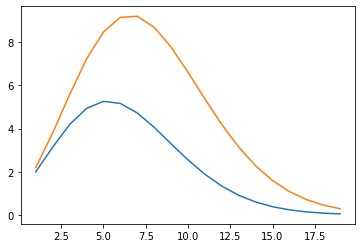

In [7]:
import math

def volume_of_hypersphere(rad,dim):
    return (math.pi**(dim/2)/math.gamma(dim/2 + 1))*rad**dim

volume_of_hypersphere(1,3)
dims = np.arange(1,20)
vols = np.array([ volume_of_hypersphere(1,i) for i in dims])
vols2 = np.array([ volume_of_hypersphere(1.1,i) for i in dims])
plt.plot(dims,vols)
plt.plot(dims,vols2)

### Q5: Part B (Concentration of Measure)
**A unit sphere has radius 1. How much volume is concentrated in the shell between radius .9 and .1 as a function of dimension?**

Play around with different values, like .95.

**Explain what's going on in the plot below by commenting the code apprropriately.**

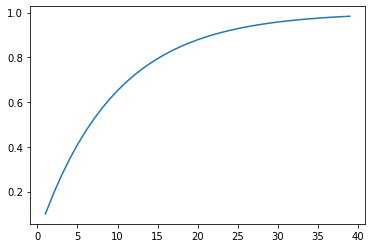

In [8]:
more_dims = np.arange(1,40)
full_volume = np.array([ volume_of_hypersphere(1,i) for i in more_dims])
inner_volume = np.array([ volume_of_hypersphere(.9,i) for i in more_dims])
volume_in_shell = full_volume-inner_volume
percent_volume = volume_in_shell/full_volume
plt.plot(more_dims,percent_volume)